In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga desde un archivo .csv sin indice
data = pd.read_csv('Datos_de_Mexicocity_sin_nulos.csv')
data.head(5)

,Unnamed: 0,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_acceptance_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2024-09-25,city scrape,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",Dici,2010-06-28,a few days or more,0.90,f,...,4.80,4.80,4.80,4.70,f,1,1,0,0,0.00
1,1,2024-09-26,previous scrape,A new concept of hosting in mexico through a b...,No overview available,Fernando,2010-08-09,within an hour,0.93,t,...,4.87,4.78,4.98,4.48,f,8,4,1,0,0.41
2,2,2024-09-26,city scrape,"Comfortably furnished, sunny, 2 bedroom apt., ...",No overview available,Nicholas,2011-01-04,within an hour,0.57,t,...,4.94,4.92,4.98,4.91,f,2,2,0,0,0.31
3,3,2024-09-25,city scrape,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,2010-08-24,within a few hours,1.00,t,...,4.96,4.98,4.96,4.92,f,3,2,1,0,0.83
4,4,2024-09-25,city scrape,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,2011-04-27,within an hour,1.00,t,...,5.00,4.73,4.91,4.82,f,3,3,0,0,0.11


In [3]:
#Verificamos los valores 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   source                                        26582 non-null  object 
 3   description                                   26582 non-null  object 
 4   neighborhood_overview                         26582 non-null  object 
 5   host_name                                     26582 non-null  object 
 6   host_since                                    26582 non-null  object 
 7   host_response_time                            26582 non-null  object 
 8   host_acceptance_rate                          26582 non-null  float64
 9   host_is_superhost                             26582 non-null 

In [4]:
#Corroboramos valores nulos del dataframe
valores_nulos = data.isnull().sum()
valores_nulos

Unnamed: 0                                      0
last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_response_time                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0


In [5]:
# Creo 2 DataFrames para poder procesar los outliers
cuantitativas = data.iloc[:, np.r_[8, 11, 16, 17, 20, 22, 23, 25:34, 36:45, 46:51]]  # Columnas específicas
cualitativas = data.iloc[:, np.r_[0:8, 9, 10, 12:16, 17:20, 21, 24, 35, 45]] 

<Figure size 1500x800 with 0 Axes>

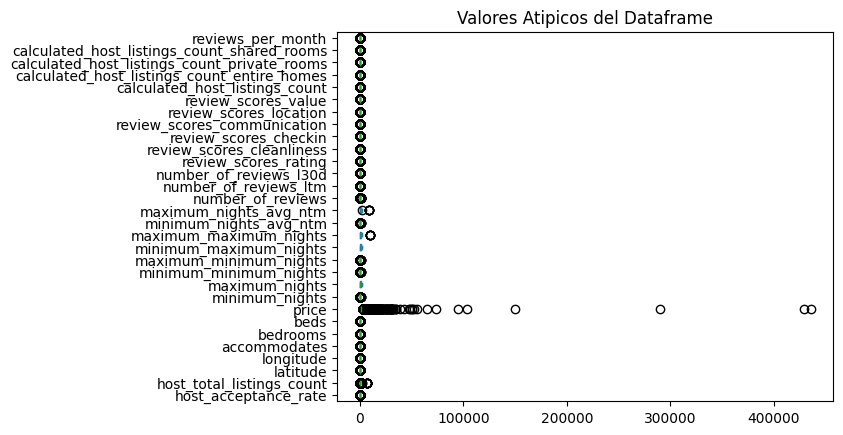

In [6]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig= plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #Dibujamos el diagrama

In [7]:
#Metodo aplicado desviacion estandar. Encuentro los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_acceptance_rate                                1.562614
host_total_listings_count                         614.887404
latitude                                           19.532892
longitude                                         -99.066742
accommodates                                       10.430103
bedrooms                                            5.339414
beds                                                6.956376
price                                           15782.311872
minimum_nights                                     81.830056
maximum_nights                                   1793.886762
minimum_minimum_nights                             78.220196
maximum_minimum_nights                             80.407806
minimum_maximum_nights                           2058.532035
maximum_maximum_nights                           2133.457176
minimum_nights_avg_ntm                             79.496621
maximum_nights_avg_ntm                           2102.28268

In [8]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe 
data3 = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data3

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.90,1.0,19.383820,NaN,2.0,1.0,1.0,3865.0,1.0,7.0,...,4.80,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,0.00
1,0.93,13.0,19.411620,-99.177940,NaN,5.0,1.0,999.0,1.0,365.0,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,0.57,4.0,19.411520,-99.168570,4.0,2.0,2.0,2029.0,2.0,30.0,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,1.00,4.0,19.356140,-99.163080,2.0,1.0,1.0,1140.0,5.0,180.0,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,1.00,7.0,19.432110,-99.193270,2.0,1.0,1.0,3633.0,1.0,365.0,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.00,279.0,19.387329,-99.246731,4.0,2.0,2.0,488.0,1.0,45.0,...,4.80,4.80,4.80,4.80,4.70,37.0,14.0,23.0,0.0,0.00
26578,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2800.0,1.0,365.0,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,0.00
26579,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2700.0,1.0,365.0,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,0.00
26580,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2600.0,1.0,365.0,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,0.00


In [9]:
#Corroboramos valores nulos del dataframe 
valores_nulos = data3.isnull().sum()
valores_nulos

host_acceptance_rate                            1103
host_total_listings_count                        380
latitude                                         357
longitude                                        712
accommodates                                     526
bedrooms                                         286
beds                                             466
price                                             94
minimum_nights                                   190
maximum_nights                                     1
minimum_minimum_nights                           174
maximum_minimum_nights                           192
minimum_maximum_nights                             0
maximum_maximum_nights                             7
minimum_nights_avg_ntm                           184
maximum_nights_avg_ntm                             7
number_of_reviews                                608
number_of_reviews_ltm                            432
number_of_reviews_l30d                        

In [10]:
#Remplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean= data3.copy()
data_clean= data_clean.fillna(round(data3.mean(),1))
data_clean

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.90,1.0,19.383820,-99.200000,2.0,1.0,1.0,3865.0,1.0,7.0,...,4.80,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,0.00
1,0.93,13.0,19.411620,-99.177940,3.1,5.0,1.0,999.0,1.0,365.0,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,0.57,4.0,19.411520,-99.168570,4.0,2.0,2.0,2029.0,2.0,30.0,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,1.00,4.0,19.356140,-99.163080,2.0,1.0,1.0,1140.0,5.0,180.0,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,1.00,7.0,19.432110,-99.193270,2.0,1.0,1.0,3633.0,1.0,365.0,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.00,279.0,19.387329,-99.246731,4.0,2.0,2.0,488.0,1.0,45.0,...,4.80,4.80,4.80,4.80,4.70,37.0,14.0,23.0,0.0,0.00
26578,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2800.0,1.0,365.0,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,0.00
26579,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2700.0,1.0,365.0,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,0.00
26580,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2600.0,1.0,365.0,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,0.00


In [11]:
#Corroboramos valores nulos del dataframe 
valores_nulos = data_clean.isnull().sum()
valores_nulos

host_acceptance_rate                            0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0


**Procedimiento "Cuantiles" para sustituir outliers en dataframe**

In [12]:
#Metodo aplicado Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentiles25= y.quantile(0.25) #Q1
percentiles75= y.quantile(0.75) #Q2
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr

print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate                               1.150000
host_total_listings_count                         39.500000
latitude                                          19.494089
longitude                                        -99.117734
accommodates                                       7.000000
bedrooms                                           3.500000
beds                                               3.500000
price                                           2713.500000
minimum_nights                                     3.500000
maximum_nights                                  2542.500000
minimum_minimum_nights                             3.500000
maximum_minimum_nights                             6.000000
minimum_maximum_nights                          2265.000000
maximum_maximum_nights                          2265.000000
minimum_nights_avg_ntm                             5.250000
maximum_nights_avg_ntm                          2265.000000
number_of_revi

In [13]:
#Obtenemos datos limpios del dataframe 
data3_iqr = cuantitativas[(y <= Limite_Superior_iqr)&(y >= Limite_Inferior_iqr)]
data3_iqr

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.90,1.0,19.383820,NaN,2.0,1.0,1.0,NaN,1.0,7,...,4.80,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,0.00
1,0.93,13.0,19.411620,-99.177940,NaN,NaN,1.0,999.0,1.0,365,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,NaN,4.0,19.411520,-99.168570,4.0,2.0,2.0,2029.0,2.0,30,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,1.00,4.0,19.356140,-99.163080,2.0,1.0,1.0,1140.0,NaN,180,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,1.00,7.0,19.432110,-99.193270,2.0,1.0,1.0,NaN,1.0,365,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.00,NaN,19.387329,NaN,4.0,2.0,2.0,488.0,1.0,45,...,4.80,4.80,4.80,4.80,4.70,NaN,14.0,NaN,0.0,0.00
26578,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,NaN,1.0,365,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,NaN,0.0,0.00
26579,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2700.0,1.0,365,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,NaN,0.0,0.00
26580,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2600.0,1.0,365,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,NaN,0.0,0.00


In [14]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

host_acceptance_rate                            2965
host_total_listings_count                       3764
latitude                                        1779
longitude                                       2845
accommodates                                    1352
bedrooms                                         858
beds                                            2447
price                                           2161
minimum_nights                                  3584
maximum_nights                                     0
minimum_minimum_nights                          3124
maximum_minimum_nights                          2040
minimum_maximum_nights                             0
maximum_maximum_nights                             7
minimum_nights_avg_ntm                          2023
maximum_nights_avg_ntm                             7
number_of_reviews                               2328
number_of_reviews_ltm                           1318
number_of_reviews_l30d                        

In [15]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del datafraame
data4_iqr= data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.90,1.0,19.383820,-99.200000,2.0,1.0,1.0,1026.3,1.0,7,...,4.80,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,0.00
1,0.93,13.0,19.411620,-99.177940,2.9,1.4,1.0,999.0,1.0,365,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,1.00,4.0,19.411520,-99.168570,4.0,2.0,2.0,2029.0,2.0,30,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,1.00,4.0,19.356140,-99.163080,2.0,1.0,1.0,1140.0,1.6,180,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,1.00,7.0,19.432110,-99.193270,2.0,1.0,1.0,1026.3,1.0,365,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.00,7.3,19.387329,-99.200000,4.0,2.0,2.0,488.0,1.0,45,...,4.80,4.80,4.80,4.80,4.70,4.9,14.0,0.7,0.0,0.00
26578,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,1026.3,1.0,365,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,0.7,0.0,0.00
26579,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2700.0,1.0,365,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,0.7,0.0,0.00
26580,1.00,16.0,19.432687,-99.197736,2.0,1.0,1.0,2600.0,1.0,365,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,0.7,0.0,0.00


In [16]:
#Unimos el dataframe cuantitativo con el dataframe cualitativo
Datos_limpios = pd. concat([cualitativas, data4_iqr], axis = 1)
Datos_limpios

,Unnamed: 0,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_is_superhost,host_neighbourhood,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2024-09-25,city scrape,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",Dici,2010-06-28,a few days or more,f,Unknown,...,4.80,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,0.00
1,1,2024-09-26,previous scrape,A new concept of hosting in mexico through a b...,No overview available,Fernando,2010-08-09,within an hour,t,Condesa,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,2,2024-09-26,city scrape,"Comfortably furnished, sunny, 2 bedroom apt., ...",No overview available,Nicholas,2011-01-04,within an hour,t,HipÃ³dromo,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,3,2024-09-25,city scrape,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,2010-08-24,within a few hours,t,CoyoacÃ¡n,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,4,2024-09-25,city scrape,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,2011-04-27,within an hour,t,Polanco,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,2024-09-25,city scrape,Experience Mexico City in this delightful retr...,"Welcome to Lomas de Bezares, a neighborhood kn...",HostPal,2016-04-16,within an hour,t,Unknown,...,4.80,4.80,4.80,4.80,4.70,4.9,14.0,0.7,0.0,0.00
26578,26578,2024-09-25,city scrape,This spacious room features a plush king-size ...,No overview available,Luis Angel,2024-08-13,within an hour,f,Polanco,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,0.7,0.0,0.00
26579,26579,2024-09-25,city scrape,Discover the essence of luxury in our king-siz...,No overview available,Luis Angel,2024-08-13,within an hour,f,Polanco,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,0.7,0.0,0.00
26580,26580,2024-09-25,city scrape,Welcome to your refuge in the heart of Polanco...,No overview available,Luis Angel,2024-08-13,within an hour,f,Polanco,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,0.7,0.0,0.00


In [17]:
#Corroboramos calores nulos del dataframe LIMPIO
valores_nulos = Datos_limpios.isnull().sum()
valores_nulos

Unnamed: 0                                      0
last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_response_time                              0
host_is_superhost                               0
host_neighbourhood                              0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
longitude                                       0
property_type                                   0
room_type                                       0
bathrooms_text                                  0
amenities                                       0
calendar_last_scraped                           0


In [18]:
#Corroboramos calores nulos del dataframe LIMPIO
valores_nulos = Datos_limpios.isnull().sum().sum()
valores_nulos

np.int64(0)

In [19]:
#Convertir Dataframa a CSV
Datos_limpios.to_csv("Mexico_limpio.csv")